In [46]:
import nltk
from nltk.corpus import stopwords
import string

import json


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1025.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}

titles = works.keys()

In [47]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [48]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [49]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [50]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [51]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [52]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [53]:
def getAverageSentenceLength(sents):
    results = 0
    for s in sents:        
        results += len(s)
    return results/len(sents)


In [54]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [55]:
def getNumberOfPronoun(sentences):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
    for s in sentences:        
        for p in pronouns:
            count += s.count(p)
    
    return count

In [56]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [57]:
def getNumberOfConjunction(sents):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        for c in conjunctions:
            count += s.count(c)
    
    return count

In [59]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(sentences)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(sentences)/normalizer)
        

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

223


,DisLegomena,HapaxLegomena,averageSentenceLength,numberOfConjunction,numberOfPronoun,numberOfSentences,numberUniqueWords
act,,,,,,,
"THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT1605",0.063415,0.312195,398.333333,0.068293,0.282927,3,0.400000
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT II.,0.025719,0.105768,43.667153,0.113681,0.187490,685,0.167707
ALLS WELL THAT ENDS WELL ACT IV.,0.032203,0.126271,49.547988,0.135876,0.199153,323,0.190113
THE FIRST PART OF HENRY THE SIXTH ACT I.,0.034520,0.127446,62.285429,0.116197,0.190322,501,0.200801
"TWELFTH NIGHT; OR, WHAT YOU WILL ACT III",0.021474,0.095838,45.456067,0.124735,0.234756,717,0.153102


In [63]:
# Filter out wierd acts, e.g. the beginning of a play

df = df[df['averageSentenceLength'] < 168]

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


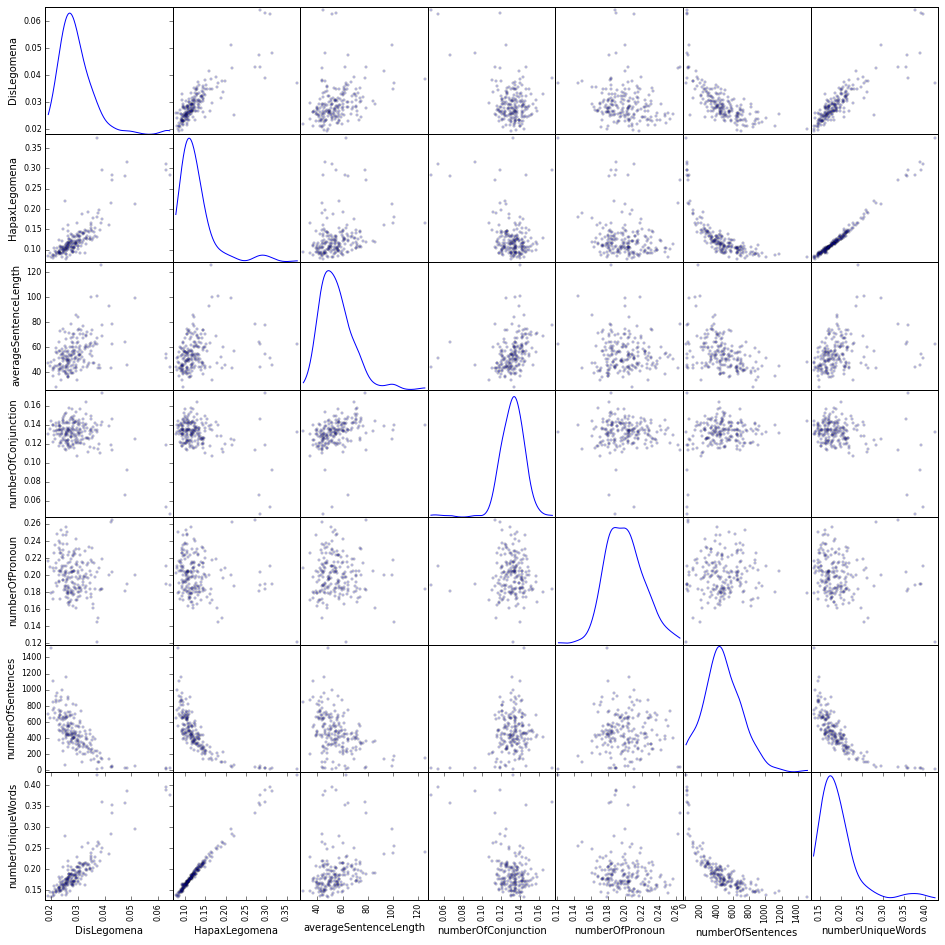

In [64]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

In [65]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

In [109]:
# excluding stop words, n-grams = 1~3
count_vect = CountVectorizer(ngram_range=(3, 5), stop_words='english')
X_train_counts = count_vect.fit_transform(text)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(190, 1135825)

In [111]:
randomState = np.random.seed(1)

X = X_train_tf

svd = TruncatedSVD(n_components = 10, random_state = randomState)
lsa = make_pipeline(svd, Normalizer(copy=False))

X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

n_clusters = 10

km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=5, random_state = randomState)

km.fit_predict(X)

print(km.labels_)

for i in range(n_clusters):
    index = np.squeeze(np.argwhere(km.labels_ == i)).tolist()
    print(index)
    
    print(np.array(title)[index])
    print('\n')
    

Explained variance of the SVD step: 5%
[8 5 0 8 2 6 3 7 1 9 6 2 3 2 4 1 7 0 6 2 0 2 0 8 4 2 0 8 1 9 1 4 0 1 0 7 0
 8 0 6 7 8 1 1 7 0 3 6 8 8 7 1 8 2 5 2 6 1 2 3 3 0 4 5 3 2 4 0 3 3 5 8 1 3
 8 0 4 8 6 3 8 3 9 7 8 9 1 8 6 1 2 6 4 5 8 9 9 3 8 6 1 8 6 0 5 0 1 7 9 7 3
 9 1 9 4 4 9 1 0 1 9 3 6 9 3 8 4 0 6 2 7 0 1 5 4 1 1 0 6 3 5 5 6 9 6 4 3 7
 0 0 3 9 6 0 6 0 2 5 0 7 8 7 1 9 4 1 3 1 6 4 0 9 0 2 8 2 3 9 6 4 9 6 7 2 6
 0 6 1 8 0]
[2, 17, 20, 22, 26, 32, 34, 36, 38, 45, 61, 67, 75, 103, 105, 118, 127, 131, 137, 148, 149, 153, 155, 158, 170, 172, 185, 189]
['THE FIRST PART OF HENRY THE SIXTH ACT I. '
 'MUCH ADO ABOUT NOTHING ACT IV.' 'THE TAMING OF THE SHREW ACT V. '
 'SECOND PART OF KING HENRY IV ACT I. '
 'THE MERRY WIVES OF WINDSOR ACT I. ' 'KING HENRY THE EIGHTH ACT III'
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT II.'
 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE ACT IV.' 'THE TEMPEST ACT II.'
 'SECOND PART OF KING HENRY IV ACT IV.'
 'THE TRAGEDY OF ROMEO AND JULIET ACT IV.'
 'THE TWO GENTLEMEN

In [117]:
df_ngrams = pd.DataFrame(data=X, index = title)
df_ngrams.head()

,0,1,2,3,4,5,6,7,8,9
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT II.,-0.059737,-0.288181,0.035190,-0.212117,0.406990,-0.334918,-0.295858,0.085724,0.701101,0.054013
ALLS WELL THAT ENDS WELL ACT IV.,-0.206255,0.168916,-0.003691,-0.319200,0.678962,0.361017,0.192643,0.403111,0.042654,-0.185128
THE FIRST PART OF HENRY THE SIXTH ACT I.,0.782403,-0.096486,-0.355192,0.212950,-0.317914,-0.049311,-0.153947,-0.269770,-0.069014,0.047827
"TWELFTH NIGHT; OR, WHAT YOU WILL ACT III",0.296026,-0.389040,0.190826,-0.313522,0.691617,0.012946,-0.250258,0.006289,0.291437,0.014152
ALLS WELL THAT ENDS WELL ACT III,0.816796,0.044632,0.161367,0.018341,-0.285525,0.008243,-0.107918,-0.328854,-0.297301,0.121264


In [119]:
df_all = df.join(df_ngrams)
df_all.head()

,DisLegomena,HapaxLegomena,averageSentenceLength,numberOfConjunction,numberOfPronoun,numberOfSentences,numberUniqueWords,0,1,2,3,4,5,6,7,8,9
act,,,,,,,,,,,,,,,,,
THE TRAGEDY OF ANTONY AND CLEOPATRA ACT II.,0.025719,0.105768,43.667153,0.113681,0.187490,685,0.167707,-0.059737,-0.288181,0.035190,-0.212117,0.406990,-0.334918,-0.295858,0.085724,0.701101,0.054013
ALLS WELL THAT ENDS WELL ACT IV.,0.032203,0.126271,49.547988,0.135876,0.199153,323,0.190113,-0.206255,0.168916,-0.003691,-0.319200,0.678962,0.361017,0.192643,0.403111,0.042654,-0.185128
THE FIRST PART OF HENRY THE SIXTH ACT I.,0.034520,0.127446,62.285429,0.116197,0.190322,501,0.200801,0.782403,-0.096486,-0.355192,0.212950,-0.317914,-0.049311,-0.153947,-0.269770,-0.069014,0.047827
"TWELFTH NIGHT; OR, WHAT YOU WILL ACT III",0.021474,0.095838,45.456067,0.124735,0.234756,717,0.153102,0.296026,-0.389040,0.190826,-0.313522,0.691617,0.012946,-0.250258,0.006289,0.291437,0.014152
ALLS WELL THAT ENDS WELL ACT III,0.042882,0.271012,78.500000,0.113208,0.264151,36,0.334477,0.816796,0.044632,0.161367,0.018341,-0.285525,0.008243,-0.107918,-0.328854,-0.297301,0.121264


In [123]:
X = df_all.values
print(X.shape)

svd = TruncatedSVD(n_components = 10, random_state = randomState)
lsa = make_pipeline(svd, Normalizer(copy=False))

X = lsa.fit_transform(X)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

n_clusters = 12

km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=5, random_state = randomState)

km.fit_predict(X)

print(km.labels_)

for i in range(n_clusters):
    index = np.squeeze(np.argwhere(km.labels_ == i)).tolist()
    print(index)
    
    print(np.array(title)[index])
    print('\n')

(190, 17)
Explained variance of the SVD step: 99%
[ 9  0  8  9 10  8  8  3  8  3  8  3  9  8 10  0  3  3  3  8  3  0  0  9  8
  0  9  9  6  4  3  0  0  0  9  3  9  3  3  3  9  3  5  8  0  8  3 11  9 11
  8  3  9  8  4  0  0  0 11  9  9  3  1  3  8  9 11  9  0 11 11  0  8  2  9
  0  9  9  3  6  3  3  8  9  8  4  7  4  8 11  8  8  0  7  9  3  4  9  3  9
 11  9  4  8  3  3  2  3 11  8  3  3  3  5 10  1  3  9  9  4  4  0  9  3  3
  4  1  9  8  9  9  0 11  3  0  3  9  8  9  8  3  3  8  9  0  3  9  7  9  9
  9  9 11  8 11  2  9  8 11  7  3  3 11  0  8  9  8  9  0  8 11  0  3  3  8
  9  8  3  1  3  7  8  8  9  2  9  4  0  0  8]
[1, 15, 21, 22, 25, 31, 32, 33, 44, 55, 56, 57, 68, 71, 75, 92, 121, 131, 134, 144, 163, 168, 171, 187, 188]
['ALLS WELL THAT ENDS WELL ACT IV.'
 'THE TRAGEDY OF TITUS ANDRONICUS ACT V. '
 "A MIDSUMMER NIGHT'S DREAM ACT V. " 'SECOND PART OF KING HENRY IV ACT I. '
 'THE COMEDY OF ERRORS ACT III'
 'THE TRAGEDY OF ANTONY AND CLEOPATRA ACT_2|S'
 'KING HENRY THE EIGHTH ACT 

In [124]:
df_all.to_excel('all feature-v1026.xlsx')